In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
%matplotlib inline
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)
import keras
import warnings # to filter out warnings

warnings.filterwarnings("ignore")


2023-09-25 14:11:41.329367: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:


(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()
'''
X_train = mnist_files['x_train'][0:10000]
y_train = mnist_files['y_train'][0:10000]
X_test = mnist_files['x_test'][0:10000]
y_test = mnist_files['y_test'][0:10000]
'''    


X_train= X_train.reshape(X_train.shape[0],X_train.shape[1]*X_train.shape[2])
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1]*X_test.shape[2])
y_train = y_train.reshape(y_train.shape[0],1)
y_test = y_test.reshape(y_test.shape[0],1)

y_train_ind = np.where( ((y_train==8) | (y_train==9)))[0]
y_test_ind = np.where( ((y_test==8) | (y_test==9)))[0]
X_train = X_train[y_train_ind, :]
X_test = X_test[y_test_ind, :]
y_train = y_train[y_train_ind, :]
y_test = y_test[y_test_ind, :]

y_train_modified = np.where(y_train == 8, 0, 1)
y_test_modified = np.where(y_test == 8, 0, 1)

11490434/11490434 [==============================] - 0s 0us/step


In [5]:
print(X_test.shape)

(1983, 784)


## Plot Few Images

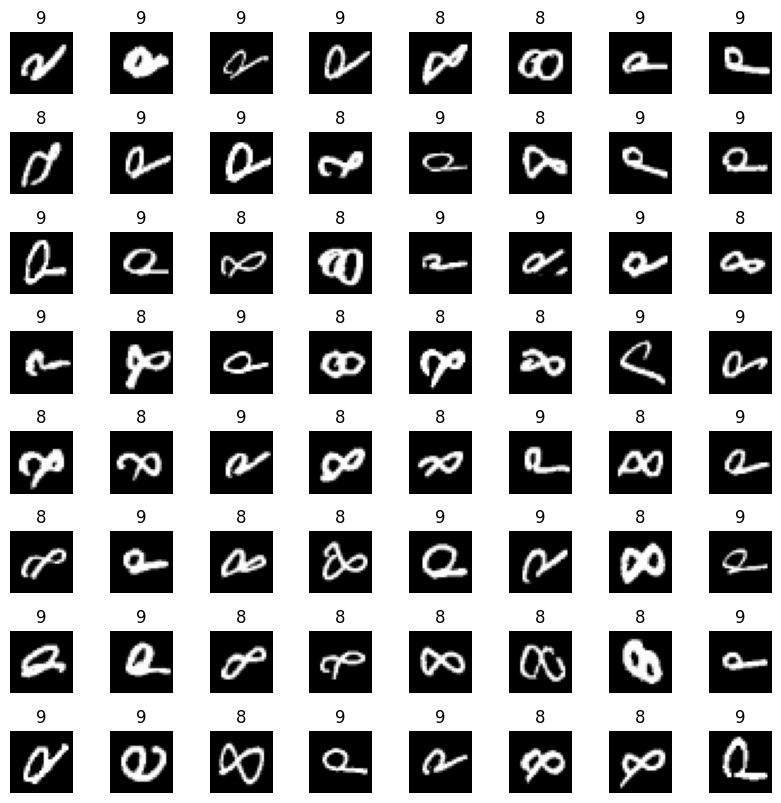

In [3]:
#Let's plot few images 

import warnings
import matplotlib.pyplot as plt
warnings.simplefilter(action='ignore', category=FutureWarning)
# You do not need to modify anything in this cell

m, n = X_train.shape

fig, axes = plt.subplots(8,8, figsize=(8,8))
fig.tight_layout(pad=0.1)

for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)
    
    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = X_train[random_index].reshape((28,28)).T
    
    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')
    
    # Display the label above the image
    ax.set_title(y_train[random_index,0])
    ax.set_axis_off()

## Function to plot image

In [4]:
import warnings
import matplotlib.pyplot as plt
warnings.simplefilter(action='ignore', category=FutureWarning)
# You do not need to modify anything in this cell
def plot_image(random_index):
    m, n = X_train.shape
    plt.figure(figsize=(3,3))
    X_random_reshaped = X_train[random_index].reshape((28,28)).T

    # Display the image
    plt.imshow(X_random_reshaped, cmap='gray')

    # Display the label above the image
    plt.title(y_train[random_index,0])
    plt.axis('off')




In [5]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import regularizers
tf.random.set_seed(1234) # for consistent results
# 2B Three NN 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import regularizers
tf.random.set_seed(1234) # for consistent results


def build_three_models(X_train,y_train_modified,kernel_initializer="random_normal"):

    model = Sequential(
        [            
            ### START CODE HERE ### 
            tf.keras.Input(shape=(784,)),
            Dense(50,activation='relu',kernel_initializer=kernel_initializer),
            Dense(25,activation='relu',kernel_initializer=kernel_initializer), 
            Dense(15,activation='relu',kernel_initializer=kernel_initializer),
            Dense(units=1, activation="sigmoid")
            
            
            ### END CODE HERE ### 
        ], name = "my_model" 
    )       


    # simple early stopping
    from keras.callbacks import EarlyStopping
    es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)
    model.compile(
        loss=tf.keras.losses.BinaryCrossentropy(),  #<-- Note
        optimizer=tf.keras.optimizers.Adam(0.0001),
        metrics=[tf.keras.metrics.BinaryAccuracy()]
    )
    history = model.fit(
        X_train,y_train_modified,
        epochs=20,validation_split=0.3,callbacks=[es]
    )


    return model, history



In [6]:
L1_num_params = 784 * 50 + 50  # W1 parameters  + b1 parameters
L2_num_params = 784 * 25 + 25  # W1 parameters  + b1 parameters
L3_num_params = 25 * 15 + 15   # W2 parameters  + b2 parameters
L4_num_params = 15 * 1 + 1     # W3 parameters  + b3 parameters
print("L1 params = ", L1_num_params, ", L2 params = ", L2_num_params, ",  L3 params = ", L3_num_params,",  L4 params = ", L4_num_params )

L1 params =  39250 , L2 params =  19625 ,  L3 params =  390 ,  L4 params =  16


In [7]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
import seaborn as sns
import pandas as pd
from sklearn.metrics import precision_recall_fscore_support as score

def return_metrics(y_test, yhat):
    cm = confusion_matrix(y_test, yhat)
    cm_df = pd.DataFrame(cm,
                        index = ['8','9'], 
                        columns = ['8','9'])
    '''
    plt.figure(figsize=(5,4))
    sns.heatmap(cm_df, annot=True)
    plt.title('Confusion Matrix')
    plt.ylabel('Actal Values')
    plt.xlabel('Predicted Values')
    plt.show()
    '''
    recall = np.diag(cm) / np.sum(cm, axis = 1)
    precision = np.diag(cm) / np.sum(cm, axis = 0)
    #print("recall - ", recall)
    #print("precision - ", precision)
    #Now the normalize the diagonal entries
    cm_accuracy = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    accuracy = cm_accuracy.diagonal()
    #print("Accuracy ",accuracy )

    report = classification_report(y_test,yhat, output_dict=True)

    df = pd.DataFrame(report).transpose()

    precision, recall, fscore, support = score(y_test, yhat)
    precision, recall, fscore, support = score(y_test, yhat)
    #over all precision recall accuracy
    '''
    print("Overall Precision",np.mean(precision))
    print("Overall Recall ",np.mean(recall))
    print("Overall fscore ", np.mean(fscore))
    print("Overall accuracy ", np.mean(accuracy))
    '''
    return cm_df, df,plt, precision, recall, accuracy, np.mean(precision), np.mean(recall),np.mean(fscore),np.mean(accuracy)


def plot_training_curve(history):
    #Training loss
    history.history['loss']
    plt.plot(history.history['loss'], label='Train')
    plt.plot(history.history['val_loss'], label='Validation')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.title('Model Loss')
    plt.legend(loc='upper right')

In [8]:
#model,history = build_three_models(X_train, y_train_modified,"random_normal")
model_pred = model.predict(X_test)
yhat = np.where(model_pred >= 0.5, 1, 0).reshape(X_test.shape[0],1)
cm_df, df,plt, precision, recall, accuracy, overall_precision, overall_recall, overall_fscore, overall_accuracy = return_metrics(y_test_modified,yhat)



NameError: name 'model' is not defined

In [ ]:
# confusion matrix, overall_precision, overall_accuracy
print("Confusion Matrix")
print(cm_df)
print("Overall Precision",overall_precision)
print("Overall Recall ",overall_recall)
print("Overall fscore ",overall_fscore)
print("Overall accuracy ", overall_accuracy)

Confusion Matrix
     8    9
8  965    9
9   21  988
Overall Precision 0.9848373721570391
Overall Recall  0.9849735338829386
Overall fscore  0.9848693714774046
Overall accuracy  0.9849735338829386


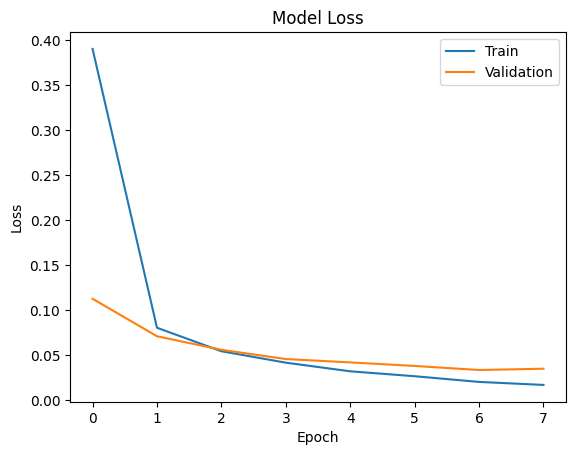

In [ ]:
plot_training_curve(history)

1/1 [==============================] - 0s 25ms/step


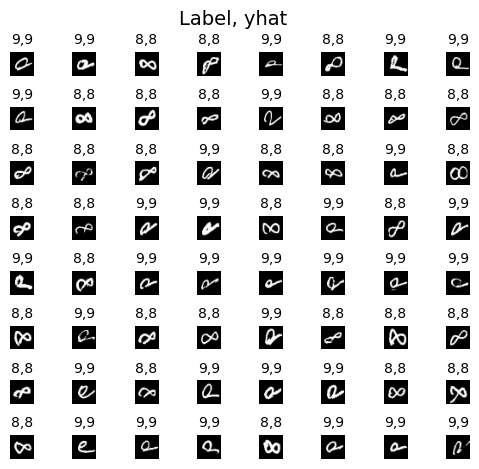

In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# You do not need to modify anything in this cell

m, n = X_train.shape

fig, axes = plt.subplots(8,8, figsize=(5,5))
fig.tight_layout(pad=0.13,rect=[0, 0.03, 1, 0.91]) #[left, bottom, right, top]
#widgvis(fig)
for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)
    
    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = X_train[random_index].reshape((28,28)).T
    
    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')
    
    # Predict using the Neural Network
    prediction = model.predict(X_train[random_index].reshape(1,784))
    
    if prediction>=0.5:
        yhat = 9
    else:
        yhat = 8
    
    # Display the label above the image
    ax.set_title(f"{y_train[random_index,0]},{yhat}",fontsize=10)
    ax.set_axis_off()
fig.suptitle("Label, yhat", fontsize=14)
plt.show()

In [ ]:
#2B Build Three NN Models

Epoch 1/20
259/259 [==============================] - 2s 4ms/step - loss: 0.2037 - binary_accuracy: 0.9190 - val_loss: 0.0993 - val_binary_accuracy: 0.9633
Epoch 2/20
259/259 [==============================] - 1s 3ms/step - loss: 0.0723 - binary_accuracy: 0.9758 - val_loss: 0.0727 - val_binary_accuracy: 0.9749
Epoch 3/20
259/259 [==============================] - 1s 5ms/step - loss: 0.0493 - binary_accuracy: 0.9829 - val_loss: 0.0634 - val_binary_accuracy: 0.9782
Epoch 4/20
259/259 [==============================] - 1s 4ms/step - loss: 0.0379 - binary_accuracy: 0.9863 - val_loss: 0.0571 - val_binary_accuracy: 0.9805
Epoch 5/20
259/259 [==============================] - 1s 3ms/step - loss: 0.0314 - binary_accuracy: 0.9898 - val_loss: 0.0584 - val_binary_accuracy: 0.9805
Epoch 5: early stopping
62/62 [==============================] - 0s 2ms/step
Model with Kernel Initializer random_normal
Confusion Matrix
     8    9
8  944   30
9   21  988
Overall Precision 0.9743843969176583
Overall R

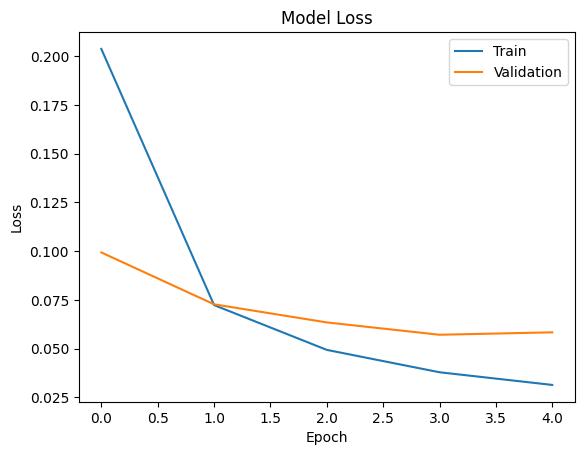

In [ ]:
#2B Building Three NN Models 
track_accuracy = []
kernel_initializer="random_normal"
model,history = build_three_models(X_train, y_train_modified,kernel_initializer)
model_pred = model.predict(X_test)
yhat = np.where(model_pred >= 0.5, 1, 0).reshape(X_test.shape[0],1)
cm_df, df,plt, precision, recall, accuracy, overall_precision, overall_recall, overall_fscore, overall_accuracy = return_metrics(y_test_modified,yhat)
print("Model with Kernel Initializer", kernel_initializer)
# confusion matrix, overall_precision, overall_accuracy
print("Confusion Matrix")
print(cm_df)
print("Overall Precision",overall_precision)
print("Overall Recall ",overall_recall)
print("Overall fscore ",overall_fscore)
print("Overall accuracy ", overall_accuracy)
track_accuracy.append(overall_accuracy)
plot_training_curve(history)

print("/n")

Epoch 1/20
259/259 [==============================] - 2s 4ms/step - loss: 0.6931 - binary_accuracy: 0.5052 - val_loss: 0.6932 - val_binary_accuracy: 0.4898
Epoch 2/20
259/259 [==============================] - 1s 3ms/step - loss: 0.6931 - binary_accuracy: 0.5103 - val_loss: 0.6932 - val_binary_accuracy: 0.4898
Epoch 2: early stopping
62/62 [==============================] - 0s 2ms/step
Model with Kernel Initializer zeros
Confusion Matrix
   8     9
8  0   974
9  0  1009
Overall Precision 0.2544125063035804
Overall Recall  0.5
Overall fscore  0.3372326203208556
Overall accuracy  0.5
/n


C:\Users\U1012152\AppData\Local\Temp\ipykernel_4852\2771846705.py:20: RuntimeWarning: invalid value encountered in divide
  precision = np.diag(cm) / np.sum(cm, axis = 0)
c:\Users\U1012152\AppData\Local\anaconda3\envs\sandbox\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\U1012152\AppData\Local\anaconda3\envs\sandbox\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\U1012152\AppData\Local\anaconda3\envs\sandbox\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: P

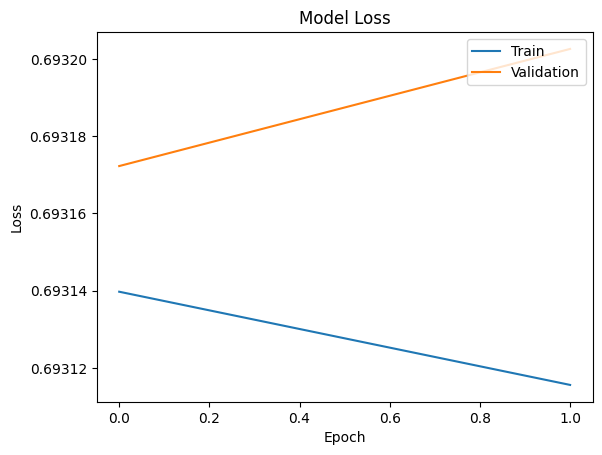

In [ ]:
#2B Building Three NN Models 
kernel_initializer="zeros"
model,history = build_three_models(X_train, y_train_modified,kernel_initializer)
model_pred = model.predict(X_test)
yhat = np.where(model_pred >= 0.5, 1, 0).reshape(X_test.shape[0],1)
cm_df, df,plt, precision, recall, accuracy, overall_precision, overall_recall, overall_fscore, overall_accuracy = return_metrics(y_test_modified,yhat)
print("Model with Kernel Initializer", kernel_initializer)
# confusion matrix, overall_precision, overall_accuracy
print("Confusion Matrix")
print(cm_df)
print("Overall Precision",overall_precision)
print("Overall Recall ",overall_recall)
print("Overall fscore ",overall_fscore)
print("Overall accuracy ", overall_accuracy)
track_accuracy.append(overall_accuracy)
plot_training_curve(history)

print("/n")


Epoch 1/20
259/259 [==============================] - 2s 4ms/step - loss: 6.0586 - binary_accuracy: 0.8363 - val_loss: 1.2870 - val_binary_accuracy: 0.9336
Epoch 2/20
259/259 [==============================] - 1s 3ms/step - loss: 0.8878 - binary_accuracy: 0.9510 - val_loss: 0.7614 - val_binary_accuracy: 0.9506
Epoch 3/20
259/259 [==============================] - 1s 4ms/step - loss: 0.5123 - binary_accuracy: 0.9636 - val_loss: 0.5753 - val_binary_accuracy: 0.9525
Epoch 4/20
259/259 [==============================] - 1s 3ms/step - loss: 0.3344 - binary_accuracy: 0.9734 - val_loss: 0.5046 - val_binary_accuracy: 0.9613
Epoch 5/20
259/259 [==============================] - 1s 3ms/step - loss: 0.2285 - binary_accuracy: 0.9781 - val_loss: 0.4484 - val_binary_accuracy: 0.9638
Epoch 6/20
259/259 [==============================] - 1s 3ms/step - loss: 0.1639 - binary_accuracy: 0.9827 - val_loss: 0.3910 - val_binary_accuracy: 0.9684
Epoch 7/20
259/259 [==============================] - 2s 7ms/ste

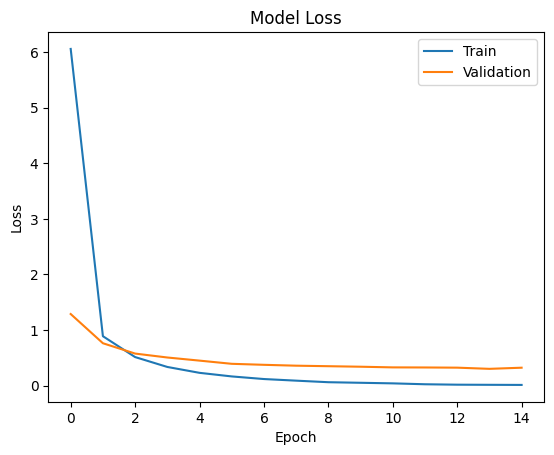

In [ ]:
#2B Building Three NN Models 
kernel_initializer="glorot_uniform"
model,history = build_three_models(X_train, y_train_modified,kernel_initializer)
model_pred = model.predict(X_test)
yhat = np.where(model_pred >= 0.5, 1, 0).reshape(X_test.shape[0],1)
cm_df, df,plt, precision, recall, accuracy, overall_precision, overall_recall, overall_fscore, overall_accuracy = return_metrics(y_test_modified,yhat)
print("Model with Kernel Initializer", kernel_initializer)
# confusion matrix, overall_precision, overall_accuracy
print("Confusion Matrix")
print(cm_df)
print("Overall Precision",overall_precision)
print("Overall Recall ",overall_recall)
print("Overall fscore ",overall_fscore)
print("Overall accuracy ", overall_accuracy)
track_accuracy.append(overall_accuracy)
plot_training_curve(history)

print("/n")


In [ ]:
#compare three models bar plots using accuracy

<BarContainer object of 3 artists>

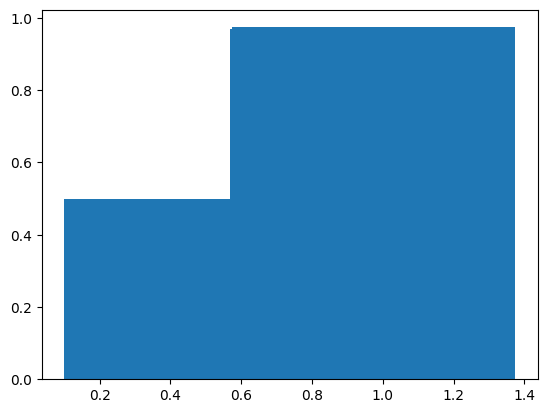

In [ ]:
plt.bar(track_accuracy,track_accuracy)


In [ ]:
#explanation 
# Glorot uniform and random initialization are prety good. Initializing with zeros is bad and it seems to get stuck in local minimum.
'''
The glorot_uniform initializer, often referred to as the Xavier uniform initializer, is designed to address some of the issues related to training deep networks. It aims to keep the variance of activations roughly the same across different layers in a deep network. Here's why it generally performs better:

Vanishing/Exploding Gradients
Deep networks suffer from vanishing and exploding gradient problems. The vanishing gradient problem makes the model virtually untrainable for the earlier layers. The exploding gradients problem can result in numerical instability.

Initial Variance
The Xavier/Glorot initialization sets the initial weights in such a way that the variance remains the same for both inputs and outputs. This is particularly useful for the sigmoid activation function and also works well for tanh and relu.

Mathematical Grounding
The Xavier initializer is derived from the understanding of the mathematical properties of activation functions. It considers the number of input and output neurons (the "fan-in" and "fan-out" of the layer) and sets the initial weights based on this.

The initializer uses the following formula to decide the bounds:
 
and initializes the weights in the layer from a uniform distribution:

Why it Performs Better:

Reduced Risk of Vanishing/Exploding Gradient: By maintaining the variance of activations, it helps to mitigate the risk of the vanishing/exploding gradient problem, making it easier for the model to learn from the error and backpropagate in a balanced manner.

Faster Convergence: Generally, weights initialized with Xavier initialization reach convergence faster since they're scaled properly.

Works Well with ReLU: Even though it was initially designed for sigmoid and tanh, it has been found to work well with ReLU activations as well, which are your activation functions in the case described.

Empirical Success: It has been shown empirically to work well in practice for training deep networks, and therefore it's often the default initializer for many types of layers in machine learning frameworks.

So, in summary, Xavier/Glorot initialization often works well in practice because it provides a good starting point for the optimization, leading to faster and more reliable training of deep networks.

'''

In [ ]:
from keras.utils import plot_model
plot_model(model, to_file='model.png')